# IBP Group Work

## Read data

Import the libraries needed for data analysis, and through the read_csv function of Pandas, parse the data in the original data file "VR_adop_data.csv" into a DataFrame, and assign the value to the variable original_data.

In [1]:
import pandas as pd
original_data = pd.read_csv("/Users/jayfan/Desktop/IBP group work/VR_adop_data.csv", index_col = 0)
original_data.head()

,id,date_range_start,adopt_type,First_Detected_Domain,adopt_days,vr_type,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,Sitemap_Size,rank,tech_spend,category
obs_id,,,,,,,,,,,,,,,,,
0,1,2021/11/1,never,2022/1/29,0,8th Wall,175.839553,7596.729613,44.232870,0.102111,1.004990,8.846411,16723.05760,1098.0,4356,"$10,000",Automotive And Vehicles
1,1,2021/10/1,never,2022/1/29,0,8th Wall,143.168316,6741.348211,41.770335,0.142167,1.005775,8.839046,17033.64211,1098.0,4356,"$10,000",Automotive And Vehicles
2,1,2021/9/1,never,2022/1/29,0,8th Wall,121.373856,7278.541898,42.175325,0.072314,1.004012,8.845929,17023.26274,1098.0,4356,"$10,000",Automotive And Vehicles
3,1,2021/8/1,never,2022/1/29,0,8th Wall,134.383410,7471.600663,39.699328,0.078176,1.003857,8.831638,17034.82709,1098.0,4356,"$10,000",Automotive And Vehicles
4,1,2021/7/1,never,2022/1/29,0,8th Wall,124.609218,7699.227857,38.771718,0.072840,1.002904,8.815799,16773.16699,1098.0,4356,"$10,000",Automotive And Vehicles


## Preliminary screening of required data

Since the impact of adopting VR on the business data of companies will be analyzed later, companies without adopt records need to be deleted first.

In [2]:
preliminary_filtered_data = original_data.copy()
count_by_id = preliminary_filtered_data['id'].value_counts()
adopt_counts = preliminary_filtered_data[preliminary_filtered_data['adopt_type'] == 'adopt'].groupby('id')['adopt_type'].count()
print(count_by_id)
print(adopt_counts)

id
804     80
244     78
11      74
10      66
392     64
        ..
1002     1
1008     1
243      1
236      1
663      1
Name: count, Length: 1325, dtype: int64
id
1        8
2        7
3       13
4       12
5        1
        ..
1319     3
1320     2
1321     2
1322     2
1324     1
Name: adopt_type, Length: 868, dtype: int64


When counting adopt_counts, some ids have a count of 0. The counts function by default ignores entries with a count of 0, which may not appear in the results. Therefore, the entries that appear in the output are then company ids that have at least one adoption record.

In [3]:
valid_id = adopt_counts.index
preliminary_filtered_data = preliminary_filtered_data[preliminary_filtered_data['id'].isin(valid_id)]

Delete variables that would not be used in subsequent analyses.

In [4]:
preliminary_filtered_data.drop(['First_Detected_Domain','rank'], axis = 1, inplace = True)
preliminary_filtered_data.head()

,id,date_range_start,adopt_type,adopt_days,vr_type,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,Sitemap_Size,tech_spend,category
obs_id,,,,,,,,,,,,,,,
0,1,2021/11/1,never,0,8th Wall,175.839553,7596.729613,44.232870,0.102111,1.004990,8.846411,16723.05760,1098.0,"$10,000",Automotive And Vehicles
1,1,2021/10/1,never,0,8th Wall,143.168316,6741.348211,41.770335,0.142167,1.005775,8.839046,17033.64211,1098.0,"$10,000",Automotive And Vehicles
2,1,2021/9/1,never,0,8th Wall,121.373856,7278.541898,42.175325,0.072314,1.004012,8.845929,17023.26274,1098.0,"$10,000",Automotive And Vehicles
3,1,2021/8/1,never,0,8th Wall,134.383410,7471.600663,39.699328,0.078176,1.003857,8.831638,17034.82709,1098.0,"$10,000",Automotive And Vehicles
4,1,2021/7/1,never,0,8th Wall,124.609218,7699.227857,38.771718,0.072840,1.002904,8.815799,16773.16699,1098.0,"$10,000",Automotive And Vehicles


## Evaluate and clean data

In this section, we will evaluate and clean the data contained in the DataFrame `preliminary_filtered_data` created in the previous section.

The data is evaluated in two main areas: structure and content, i.e. neatness and cleanliness. Problems with the structure of the data mean that the three criteria of "one variable per column, one observation per row and one value per cell" are not met, while problems with the content of the data include the presence of missing data, duplicated data, invalid data and so on.

### Evaluate the neatness of the data (whether there are structural problems)

In [5]:
preliminary_filtered_data.sample(10)

,id,date_range_start,adopt_type,adopt_days,vr_type,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,Sitemap_Size,tech_spend,category
obs_id,,,,,,,,,,,,,,,
15062,796,2019/11/1,adopt,548 days 00:00:00,Sirv,0.000000,4101.01000,14.500000,0.033781,1.0,8.000000,1474.000000,NaN,"$2,000",Home And Garden
23397,1288,2019/12/1,never,0,WP VR,15.025000,1030.29000,38.000000,0.041676,2.0,24.000000,41761.500000,220.0,"$1,000",Food And Drink
21785,1183,2019/4/1,never,0,Viar.Live,0.000000,565.00000,71.500000,0.011111,1.0,6.857143,1532.000000,NaN,$100,Hobbies And Interests
21677,1180,2021/4/1,never,0,Viar.Live,0.000000,306.21000,18.000000,0.142857,1.0,6.428571,583.000000,NaN,$100,Automotive And Vehicles
22101,1200,2020/11/1,never,0,Viar.Live,0.000000,246.25000,60.000000,0.089431,1.0,8.428571,3744.000000,NaN,"$1,000",Sports
2368,99,2019/2/1,never,0,WalkMe,33.000000,5472.50000,30.500000,9.616525,1.0,6.000000,478.000000,NaN,"$2,000",Law Govt And Politics
22136,1202,2019/8/1,never,0,Viar.Live,0.000000,603.20000,47.500000,0.020833,1.0,12.107143,2887.000000,NaN,"$1,000",Health And Fitness
4806,248,2022/6/1,adopt,53 days 00:00:00,Model Viewer,11.553571,3834.70500,37.392857,0.525951,1.0,4.928571,971.928571,NaN,$500,Style And Fashion
1558,76,2021/11/1,never,0,WalkMe,1.582500,7634.73625,26.669643,0.549799,1.0,7.140306,1248.928571,5572.0,"$10,000",Style And Fashion


From the 10 rows of data sampled, the data conforms to "one variable per column, one observation per row, one value per cell", specifically, each row is about the operation of a particular company in a particular month, and each column is about each variable related to the operation, so there is no structural problem.

### Evaluate the cleanliness of the data

In [6]:
preliminary_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18857 entries, 0 to 23982
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   18857 non-null  int64  
 1   date_range_start     18857 non-null  object 
 2   adopt_type           18851 non-null  object 
 3   adopt_days           18851 non-null  object 
 4   vr_type              18857 non-null  object 
 5   online_spend         18857 non-null  float64
 6   total_spend          18857 non-null  float64
 7   dwell_time_median    18857 non-null  float64
 8   CR_visit             18857 non-null  float64
 9   store_quantity_city  18857 non-null  float64
 10  average_open_hours   16669 non-null  float64
 11  store_size           18857 non-null  float64
 12  Sitemap_Size         3121 non-null   float64
 13  tech_spend           18857 non-null  object 
 14  category             18028 non-null  object 
dtypes: float64(8), int64(1), object(6)
memory

From the output result, there are 18857 observations in total, and there are missing values for adopt_type, adopt_days, average_open_hours, Sitemap_Size, and category. 

average_open_hours will only be used to analyse the average value, so there is no need to deal with the null value.
Sitemap_Size has too many missing values, which is meaningless for the subsequent analysis, so the whole column is directly deleted.

In addition, id data type should be a string, date_range_start data type should be a date, adopt_days and tech_spend data type should be float, should be converted to data format.

#### i.Data format conversion

In [7]:
# The original format of adopt_days is like '51 days 00:00:00', it can't be converted to float directly, 
# it should be split first.
preliminary_filtered_data[preliminary_filtered_data['adopt_days'] != '0']

,id,date_range_start,adopt_type,adopt_days,vr_type,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,Sitemap_Size,tech_spend,category
obs_id,,,,,,,,,,,,,,,
11,1,2022/2/1,adopt,3 days 00:00:00,8th Wall,161.638983,6515.044518,42.823899,0.077668,1.003155,8.841724,16913.54717,1098.0,"$10,000",Automotive And Vehicles
12,1,2022/9/1,adopt,215 days 00:00:00,8th Wall,202.633626,7295.044595,44.917984,0.097589,1.004965,8.815806,16860.82213,1098.0,"$10,000",Automotive And Vehicles
13,1,2022/8/1,adopt,184 days 00:00:00,8th Wall,241.937340,8137.653605,45.103336,0.099025,1.007470,8.829280,16803.62929,1098.0,"$10,000",Automotive And Vehicles
14,1,2022/6/1,adopt,123 days 00:00:00,8th Wall,192.992364,7509.030923,46.776547,0.190388,1.004638,8.808872,16732.50693,1098.0,"$10,000",Automotive And Vehicles
15,1,2022/5/1,adopt,92 days 00:00:00,8th Wall,164.426206,6980.504320,45.889691,0.080757,1.003102,8.822941,16990.19794,1098.0,"$10,000",Automotive And Vehicles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23976,1321,2022/8/1,adopt,259 days 00:00:00,WP VR,0.000000,4129.440000,100.000000,0.021505,1.000000,24.000000,1961.00000,NaN,$500,Science
23977,1321,2022/10/1,adopt,320 days 00:00:00,WP VR,0.000000,1400.000000,78.500000,0.025000,1.000000,24.000000,1961.00000,NaN,$500,Science
23978,1322,2022/8/1,adopt,241 days 00:00:00,WP VR,0.000000,404.320000,87.000000,0.010638,1.000000,NaN,2390.00000,NaN,$10,Travel


In [8]:
split_day = preliminary_filtered_data['adopt_days'].str.split(pat = ' ', expand = True)
split_day[split_day[0] != '0']

,0,1,2
obs_id,,,
11,3,days,00:00:00
12,215,days,00:00:00
13,184,days,00:00:00
14,123,days,00:00:00
15,92,days,00:00:00
...,...,...,...
23976,259,days,00:00:00
23977,320,days,00:00:00
23978,241,days,00:00:00


In [9]:
preliminary_filtered_data['adopt_days'] = split_day[0]

In [10]:
# The original format of tech_spend is like '$10,000', it can't be converted to float directly, 
# it should be converted by removing the currency symbol first.
preliminary_filtered_data['tech_spend'] = preliminary_filtered_data['tech_spend'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
preliminary_filtered_data['id'] = preliminary_filtered_data['id'].astype(str)
preliminary_filtered_data['adopt_days'] = preliminary_filtered_data['adopt_days'].astype(float)
preliminary_filtered_data["date_range_start"] = pd.to_datetime(preliminary_filtered_data["date_range_start"])

#### ii.Using date_range_start as the time series, sorted in ascending order by "id" to facilitate subsequent data analysis.

In [12]:
preliminary_filtered_data.sort_values(by=['id', 'date_range_start'],inplace = True)

#### iii.Handling of missing data

Sitemap_Size has too many missing values to be meaningful for subsequent analyses, so it directly deletes the entire column.

In [13]:
preliminary_filtered_data.drop('Sitemap_Size', axis = 1, inplace = True)

Extracts observations with missing `adopt_type`.

In [14]:
preliminary_filtered_data[preliminary_filtered_data['adopt_type'].isnull()]

,id,date_range_start,adopt_type,adopt_days,vr_type,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,tech_spend,category
obs_id,,,,,,,,,,,,,,
23415,1289,2022-05-01,NaN,NaN,WP VR,0.0,786.000000,42.000000,0.126761,1.0,NaN,160.000000,500.0,Food And Drink
6874,311,2022-09-01,NaN,NaN,Model Viewer,0.0,157.870000,15.000000,0.074074,1.0,13.142857,1745.000000,250.0,Technology And Computing
8225,352,2022-04-01,NaN,NaN,Model Viewer,0.0,72.550000,41.500000,0.526882,1.0,6.000000,7597.500000,1000.0,Art And Entertainment
10509,438,2022-03-01,NaN,NaN,Model Viewer,0.0,53.500000,23.000000,0.125000,1.0,NaN,741.000000,500.0,Business And Industrial
15531,820,2020-10-01,NaN,NaN,SmileSnap,0.0,1638.677143,57.857143,0.168217,1.4,7.326531,748.571429,2000.0,Health And Fitness
17332,910,2020-11-01,NaN,NaN,SmileSnap,0.0,1748.850000,51.000000,0.900000,1.0,3.714286,572.000000,250.0,Business And Industrial


From the output, there are a total of 6 pieces of operational data missing adopt_type variable values.

The 6 entries with missing adopt_type values also miss adopt_days values.

In [15]:
preliminary_filtered_data[preliminary_filtered_data['id'] == '311']

,id,date_range_start,adopt_type,adopt_days,vr_type,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,tech_spend,category
obs_id,,,,,,,,,,,,,,
6900,311,2019-01-01,never,0.0,Model Viewer,21.770,702.410,36.50,0.592996,1.0,13.000000,295.0,250.0,Technology And Computing
6899,311,2019-02-01,never,0.0,Model Viewer,40.180,1310.820,60.50,1.266304,1.0,13.000000,139.0,250.0,Technology And Computing
6898,311,2019-03-01,never,0.0,Model Viewer,15.610,666.190,24.00,0.446627,1.0,13.000000,295.0,250.0,Technology And Computing
6897,311,2019-04-01,never,0.0,Model Viewer,12.190,745.915,29.00,0.463455,1.0,13.000000,295.0,250.0,Technology And Computing
6896,311,2019-05-01,never,0.0,Model Viewer,25.005,712.150,15.50,0.456391,1.0,13.000000,295.0,250.0,Technology And Computing
6895,311,2019-06-01,never,0.0,Model Viewer,24.680,709.050,16.75,0.440367,1.0,13.000000,295.0,250.0,Technology And Computing
6894,311,2019-07-01,never,0.0,Model Viewer,29.890,805.045,27.50,0.403421,1.0,13.000000,295.0,250.0,Technology And Computing
6893,311,2019-08-01,never,0.0,Model Viewer,17.550,708.875,24.00,0.369757,1.0,13.000000,295.0,250.0,Technology And Computing
6892,311,2019-10-01,never,0.0,Model Viewer,5.745,482.830,44.00,0.313815,1.0,13.000000,295.0,250.0,Technology And Computing


Taking the enterprise with id 311 as an example, we can tell by the adopt_days before and after the missing value that the value of the missing adopt_type is 'never' and the value of the missing adopt_days is '0 '.

Similarly, it can be determined that the value of the remaining 5 missing adopt_types are all 'never' and the value of adopt_days is 0

In [16]:
preliminary_filtered_data["adopt_type"].fillna('never',inplace=True)
preliminary_filtered_data["adopt_days"].fillna(0.0,inplace=True)

Extracts observations with missing `category`.

In [17]:
preliminary_filtered_data[preliminary_filtered_data['category'].isnull()]

,id,date_range_start,adopt_type,adopt_days,vr_type,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,tech_spend,category
obs_id,,,,,,,,,,,,,,
18546,1015,2019-01-01,never,0.0,Smile Virtual,0.0,3805.260,686.5,1.166667,1.0,6.428571,1841.0,10.0,NaN
18545,1015,2019-03-01,never,0.0,Smile Virtual,0.0,8611.000,315.5,6.500000,1.0,6.428571,1841.0,10.0,NaN
18544,1015,2019-04-01,never,0.0,Smile Virtual,0.0,1500.000,298.0,1.500000,1.0,6.428571,1841.0,10.0,NaN
18543,1015,2019-08-01,never,0.0,Smile Virtual,0.0,972.100,11.0,7.000000,1.0,6.428571,1841.0,10.0,NaN
18542,1015,2019-10-01,never,0.0,Smile Virtual,0.0,2097.500,364.5,0.750000,1.0,6.428571,1841.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17917,979,2022-05-01,adopt,612.0,Magic 360,0.0,3233.100,53.0,0.019802,1.0,7.428571,7230.0,0.0,NaN
17916,979,2022-06-01,adopt,643.0,Magic 360,0.0,125.875,28.5,0.509091,1.0,7.428571,3654.0,0.0,NaN
17915,979,2022-08-01,adopt,704.0,Magic 360,0.0,163.000,20.5,0.073529,1.0,NaN,78.0,0.0,NaN


In [18]:
s1 = preliminary_filtered_data['id'].value_counts()
total_records = s1.rename('total_records')
s2 = preliminary_filtered_data[preliminary_filtered_data['category'].isnull()]['id'].value_counts()
NaN_category = s2.rename('NaN_category')
category_info = pd.merge(total_records, NaN_category, on='id')
category_info['NaN_ratio'] = category_info['NaN_category'] / category_info['total_records']
category_info

,total_records,NaN_category,NaN_ratio
id,,,
250,42,42,1.0
72,42,42,1.0
1303,41,41,1.0
125,39,39,1.0
1177,39,39,1.0
1099,39,39,1.0
824,36,36,1.0
1153,34,34,1.0
860,31,31,1.0


Values missing category cannot be inferred from other records with the same id, but category is one of the important factors in our analysis, so we can only delete the records corresponding to these null values.

In [19]:
preliminary_filtered_data = preliminary_filtered_data.dropna(subset=['category'])

Check the sum of the number of missing values in the column after processing.

In [20]:

print(preliminary_filtered_data["adopt_type"].isnull().sum())
print(preliminary_filtered_data["adopt_days"].isnull().sum())

0
0


#### iv.Dealing with outliers

In [21]:
preliminary_filtered_data.groupby('id').describe()

date_range_start                                                      \
                count                           mean                  min   
id                                                                          
1                  42  2020-10-28 21:08:34.285714176  2019-01-01 00:00:00   
10                 66            2021-01-02 16:00:00  2019-01-01 00:00:00   
100                37  2020-09-06 18:48:38.918918912  2019-01-01 00:00:00   
1000                3            2022-08-31 16:00:00  2022-08-01 00:00:00   
1001               10            2020-01-09 16:48:00  2019-01-01 00:00:00   
...               ...                            ...                  ...   
993                39  2020-10-31 00:36:55.384615424  2019-01-01 00:00:00   
995                30            2020-04-22 06:24:00  2019-01-01 00:00:00   
996                 5            2020-12-24 14:24:00  2019-08-01 00:00:00   
998                 1            2022-02-01 00:00:00  2022-02-01 00:00:00   
999                 3            2022-08-31 16:00:00  2022-08-01 00:00:00   

                                                                     \
                      25%                  50%                  75%   
id                                                                    
1     2019-12-08 18:00:00  2020-10-16 12:00:00  2021-09-23 12:00:00   
10    2019-12-01 00:00:00  2021-02-01 00:00:00  2021-11-01 00:00:00   
100   2019-11-01 00:00:00  2020-09-01 00:00:00  2021-07-01 00:00:00   
1000  2022-08-16 12:00:00  2022-09-01 00:00:00  2022-09-16 00:00:00   
1001  2019-06-16 06:00:00  2019-12-01 12:00:00  2020-05-01 18:00:00   
...                   ...                  ...                  ...   
993   2019-12-16 12:00:00  2020-10-01 00:00:00  2021-09-16 00:00:00   
995   2019-08-16 06:00:00  2020-04-16 00:00:00  2020-11-23 12:00:00   
996   2020-01-01 00:00:00  2021-03-01 00:00:00  2021-07-01 00:00:00   
998   2022-02-01 00:00:00  2022-02-01 00:00:00  2022-02-01 00:00:00   
999   2022-08-16 12:00:00  2022-09-01 00:00:00  2022-09-16 00:00:00   

                               adopt_days               ...    store_size  \
                      max  std      count         mean  ...           max   
id                                                      ...                 
1     2022-10-01 00:00:00  NaN       42.0    22.738095  ...  17633.255430   
10    2022-10-01 00:00:00  NaN       66.0     7.242424  ...  17883.500000   
100   2022-10-01 00:00:00  NaN       37.0    17.054054  ...   4369.833333   
1000  2022-10-01 00:00:00  NaN        3.0   402.666667  ...  14877.000000   
1001  2022-03-01 00:00:00  NaN       10.0    76.400000  ...   1367.000000   
...                   ...  ...        ...          ...  ...           ...   
993   2022-10-01 00:00:00  NaN       39.0  1066.025641  ...    930.000000   
995   2022-08-01 00:00:00  NaN       30.0    88.766667  ...   1986.000000   
996   2022-09-01 00:00:00  NaN        5.0  2016.600000  ...    217.000000   
998   2022-02-01 00:00:00  NaN        1.0   391.000000  ...  18806.000000   
999   2022-10-01 00:00:00  NaN        3.0    95.666667  ...  13935.000000   

                  tech_spend                                               \
              std      count     mean      min      25%      50%      75%   
id                                                                          
1      196.952278       42.0  10000.0  10000.0  10000.0  10000.0  10000.0   
10    5121.099367       66.0  10000.0  10000.0  10000.0  10000.0  10000.0   
100    634.644454       37.0   5000.0   5000.0   5000.0   5000.0   5000.0   
1000     0.000000        3.0   2000.0   2000.0   2000.0   2000.0   2000.0   
1001     0.000000       10.0     50.0     50.0     50.0     50.0     50.0   
...           ...        ...      ...      ...      ...      ...      ...   
993      0.000000       39.0   5000.0   5000.0   5000.0   5000.0   5000.0   
995    230.226048       30.0   2000.0   2000.0   2000.0   2000.0   2000.0   
996  

In [22]:
preliminary_filtered_data.describe()

,date_range_start,adopt_days,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,tech_spend
count,18028,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,15973.000000,1.802800e+04,18028.000000
mean,2020-11-28 09:18:10.303971840,103.140226,111.344496,4636.533225,68.465837,2.385729,1.073610,8.596511,2.628005e+04,2113.854005
min,2019-01-01 00:00:00,0.000000,0.000000,0.040000,4.000000,0.000043,1.000000,0.714286,1.600000e+01,0.000000
25%,2019-12-01 00:00:00,0.000000,0.000000,490.000000,20.500000,0.061560,1.000000,6.428571,3.575000e+02,250.000000
50%,2020-12-01 00:00:00,0.000000,0.000000,1416.315000,35.500000,0.214286,1.000000,7.714286,8.440000e+02,500.000000
75%,2021-11-01 00:00:00,58.000000,0.000000,3867.148375,68.000000,0.909091,1.000000,9.747253,3.400000e+03,2000.000000
max,2022-10-01 00:00:00,3355.000000,26302.666670,511175.170000,1432.000000,841.763265,6.000000,24.000000,2.490956e+06,10000.000000
std,NaN,270.278032,773.054803,13902.842969,98.896780,16.737635,0.296477,3.865258,1.595190e+05,3069.155178


The data span is very large, and statistical methods need to be used to exclude abnormal maxima and minima. 

Use mean+-std as the upper and lower bounds of the data, find the extreme values and replace them with the means

In [23]:
selected_columns = ['online_spend', 'total_spend', 'dwell_time_median', 'CR_visit', 'store_quantity_city',
                    'average_open_hours', 'store_size']

grouped_means = preliminary_filtered_data.groupby('id')[selected_columns].mean()

for column in selected_columns:
    mean_column = grouped_means[column]
    std_column = preliminary_filtered_data.groupby('id')[column].std()
    
    upper_bound = mean_column + 1*std_column
    lower_bound = mean_column - 1*std_column
    
    preliminary_filtered_data[column] = preliminary_filtered_data.apply(
        lambda row: mean_column[row['id']] if row[column] > upper_bound[row['id']] or row[column] < lower_bound[row['id']] else row[column],
        axis=1)

In [24]:
preliminary_filtered_data.describe()

,date_range_start,adopt_days,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,tech_spend
count,18028,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,15973.000000,1.802800e+04,18028.000000
mean,2020-11-28 09:18:10.303971840,103.140226,86.534751,4150.954035,62.156477,1.811360,1.071321,8.588954,2.543385e+04,2113.854005
min,2019-01-01 00:00:00,0.000000,0.000000,0.450000,4.000000,0.000043,1.000000,0.714286,2.500000e+01,0.000000
25%,2019-12-01 00:00:00,0.000000,0.000000,548.853846,21.000000,0.066667,1.000000,6.357143,3.700000e+02,250.000000
50%,2020-12-01 00:00:00,0.000000,0.000000,1430.948537,35.906098,0.214331,1.000000,7.714286,8.580000e+02,500.000000
75%,2021-11-01 00:00:00,58.000000,0.000000,3573.146486,64.500000,0.812169,1.000000,9.714286,3.422333e+03,2000.000000
max,2022-10-01 00:00:00,3355.000000,10799.883333,310334.810000,1432.000000,380.453704,4.000000,24.000000,2.331774e+06,10000.000000
std,NaN,270.278032,582.622015,11775.570650,82.688835,11.059731,0.281020,3.860359,1.535934e+05,3069.155178


In [25]:
cleaned_data = preliminary_filtered_data.copy()

In [26]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18028 entries, 41 to 18378
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   18028 non-null  object        
 1   date_range_start     18028 non-null  datetime64[ns]
 2   adopt_type           18028 non-null  object        
 3   adopt_days           18028 non-null  float64       
 4   vr_type              18028 non-null  object        
 5   online_spend         18028 non-null  float64       
 6   total_spend          18028 non-null  float64       
 7   dwell_time_median    18028 non-null  float64       
 8   CR_visit             18028 non-null  float64       
 9   store_quantity_city  18028 non-null  float64       
 10  average_open_hours   15973 non-null  float64       
 11  store_size           18028 non-null  float64       
 12  tech_spend           18028 non-null  float64       
 13  category             18028 non-null

## The data cleaning has been completed, the next step is to use the existing data to calculate the quantitative indicators needed in the subsequent analysis process.

### i.Calculate the EFFECT of using VR on each business's operational data

In [27]:
changes = []
never_data = cleaned_data[cleaned_data['adopt_type'] == 'never']
adopt_data = cleaned_data[cleaned_data['adopt_type'] == 'adopt']

for id in cleaned_data['id'].unique():
    never_data_id = never_data[never_data['id'] == id]
    adopt_data_id = adopt_data[adopt_data['id'] == id]
    
    if not never_data_id.empty and not adopt_data_id.empty:
        total_spend_change = adopt_data_id['total_spend'].mean() - never_data_id['total_spend'].mean()
        dwell_time_change = adopt_data_id['dwell_time_median'].mean() - never_data_id['dwell_time_median'].mean()
        CR_visit_change = adopt_data_id['CR_visit'].mean() - never_data_id['CR_visit'].mean()

        total_spend_change_rate = (total_spend_change / never_data_id['total_spend'].mean())*100 if never_data_id['total_spend'].mean() != 0 else None
        dwell_time_change_rate = (dwell_time_change / never_data_id['dwell_time_median'].mean())*100 if never_data_id['dwell_time_median'].mean() != 0 else None
        CR_visit_change_rate = (CR_visit_change / never_data_id['CR_visit'].mean())*100 if never_data_id['CR_visit'].mean() != 0 else None
        
        total_spend_mean_never = never_data_id['total_spend'].mean()
        total_spend_mean_adopt = adopt_data_id['total_spend'].mean()

        changes.append({
            'id': id,
            'total_spend_change': total_spend_change,
            'total_spend_change_rate': total_spend_change_rate,
            'dwell_time_change': dwell_time_change,
            'dwell_time_change_rate': dwell_time_change_rate,
            'CR_visit_change': CR_visit_change,
            'CR_visit_change_rate': CR_visit_change_rate,
            'total_spend_mean(never)': total_spend_mean_never,
            'total_spend_mean(adopt)': total_spend_mean_adopt})

changes_df = pd.DataFrame(changes)
changes_df.set_index('id', inplace=True)
changes_df

,total_spend_change,total_spend_change_rate,dwell_time_change,dwell_time_change_rate,CR_visit_change,CR_visit_change_rate,total_spend_mean(never),total_spend_mean(adopt)
id,,,,,,,,
1,277.007033,4.008427,1.043919,2.386606,0.016087,23.377376,6910.616536,7187.623569
10,421.350668,20.095562,3.732606,15.318351,0.274302,44.841255,2096.734968,2518.085636
100,362.588995,30.676163,-2.239467,-19.335228,0.093686,156.539501,1181.989406,1544.578401
1001,-80.889143,-19.249826,-9.052381,-7.053672,0.012125,128.672338,420.207143,339.318000
101,-503.619148,-37.674730,0.895833,6.761006,0.059918,137.740309,1336.755814,833.136667
...,...,...,...,...,...,...,...,...
989,10508.407308,128.343668,3.004808,8.709588,0.059345,65.162990,8187.710000,18696.117308
99,2040.714633,35.465129,-7.384468,-11.311666,0.084925,1.318040,5754.144165,7794.858798
990,16.777833,13.639258,-4.841667,-30.323591,0.000335,1.101569,123.011333,139.789167


### ii.calculate all category abandon ratio

In [28]:
def calculate_all_abandon_ratio(category):
    category_data = cleaned_data[cleaned_data['category'] == category]

    total_ids = category_data['id'].nunique()

    abandon_ids = category_data[category_data['adopt_type'] == 'abandon']['id'].nunique()

    abandon_ratio = abandon_ids / total_ids if abandon_ids != 0 else 0

    return abandon_ratio

category_abandon_ratio = []
for category in cleaned_data['category'].drop_duplicates():
    abandon_ratio = calculate_all_abandon_ratio(category)
    category_abandon_ratio.append({'category': category, 'Abandon Ratio': abandon_ratio})

category_abandon_ratio_df = pd.DataFrame(category_abandon_ratio)
category_abandon_ratio_df = category_abandon_ratio_df.dropna(subset=['category'])
category_abandon_ratio_df

,category,Abandon Ratio
0,Automotive And Vehicles,0.108108
1,Style And Fashion,0.082569
2,Finance,0.137931
3,Business And Industrial,0.052632
4,Health And Fitness,0.010417
5,Technology And Computing,0.059701
6,Art And Entertainment,0.080645
7,Education,0.142857
8,Law Govt And Politics,0.000000
9,Food And Drink,0.030928


In this report, we will analyse the current business situation of Model Viewer, the leading VR developer, as well as its strongest competitor (VR developer which is ranked second or third in terms of market share).

### iii.Find Model Viewer's strongest competitors:

In [29]:
users_num = cleaned_data.groupby('vr_type')['id'].nunique()
users_num.sort_values(ascending=False)

vr_type
Model Viewer     281
WalkMe           104
SmileSnap         95
Smile Virtual     63
Sirv              51
Viar.Live         49
A-Frame           48
Panoskin          35
WP VR             33
Magic 360         25
CloudPano         21
8th Wall          10
WhatFix            6
Magnify            1
Lapentor           1
Cappasity          1
iStaging           1
Name: id, dtype: int64

In [30]:
df1 = cleaned_data[['id', 'adopt_type', 'vr_type', 'category']]

last_record_per_id = df1.drop_duplicates(subset='id', keep='last')

# 筛选出 adopt_type 为 'adopt' 的记录
currently_adopted_data = last_record_per_id[last_record_per_id['adopt_type'] == 'adopt']
currently_adopted_data.drop(['adopt_type'], axis = 1, inplace = True)
currently_adopted_data

/var/folders/9b/_fcfq86d62l5143vzjb_3wp80000gn/T/ipykernel_52413/2025751081.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currently_adopted_data.drop(['adopt_type'], axis = 1, inplace = True)


,id,vr_type,category
obs_id,,,
18,1,8th Wall,Automotive And Vehicles
2384,100,WalkMe,Finance
18381,1000,Magic 360,Business And Industrial
18382,1001,Magic 360,Style And Fashion
18393,1003,Magic 360,Style And Fashion
...,...,...,...
18299,993,Magic 360,Automotive And Vehicles
18330,995,Magic 360,Style And Fashion
18356,996,Magic 360,Travel


In [31]:
def calculate_ms(vr_type):
    vr_data = currently_adopted_data[currently_adopted_data['vr_type'] == vr_type]
    vr_ids = vr_data['id'].nunique()
    ms = vr_ids / 761
    return ms

ms = []

for vr_type in currently_adopted_data['vr_type'].unique():
    share = calculate_ms(vr_type)
    ms.append({'VR Type': vr_type, 'Market Share': share})

ms_df = pd.DataFrame(ms)
ms_df.sort_values(by=['Market Share'],ascending=False ,inplace = True)
ms_df

,VR Type,Market Share
14,Model Viewer,0.352168
16,SmileSnap,0.115637
1,WalkMe,0.114323
3,Smile Virtual,0.082786
10,Viar.Live,0.063075
15,Sirv,0.060447
4,A-Frame,0.053876
12,Panoskin,0.043364
11,WP VR,0.040736
2,Magic 360,0.032852


According to statistics, the second and third largest VR developers in terms of market share are WalkMe, SmileSnap

In [32]:
top_3 = ['Model Viewer', 'WalkMe', 'SmileSnap']
top3_cleaned_data = cleaned_data[cleaned_data['vr_type'].isin(top_3)]

### iv.Calculate the abandon ratio of  Model Viewer, WalkMe and SmileSnap in each industry

In [33]:
def calculate_abandon_ratio(vr_type):
    vr_data = cleaned_data[cleaned_data['vr_type'] == vr_type]
    total_ids = vr_data.groupby('category')['id'].nunique()
    abandon_ids = vr_data[vr_data['adopt_type'] == 'abandon'].groupby('category')['id'].nunique()
    abandon_ratio = abandon_ids.reindex(total_ids.index).fillna(0) / total_ids
    return abandon_ratio

In [34]:
model_viewer_abandon_ratio = calculate_abandon_ratio('Model Viewer')
walkme_abandon_ratio = calculate_abandon_ratio('WalkMe')
smilesnap_abandon_ratio = calculate_abandon_ratio('SmileSnap')

abandon_ratio = pd.DataFrame({
    'Model Viewer': model_viewer_abandon_ratio,
    'WalkMe': walkme_abandon_ratio,
    'SmileSnap': smilesnap_abandon_ratio}).reset_index()

abandon_ratio

,category,Model Viewer,WalkMe,SmileSnap
0,Art And Entertainment,0.000000,0.666667,0.000000
1,Automotive And Vehicles,0.000000,0.363636,0.000000
2,Business And Industrial,0.107143,0.000000,0.066667
3,Careers,NaN,1.000000,NaN
4,Education,0.333333,0.250000,0.000000
5,Family And Parenting,NaN,NaN,0.333333
6,Finance,0.000000,0.062500,0.250000
7,Food And Drink,0.000000,0.000000,0.000000
8,Health And Fitness,0.000000,0.000000,0.055556
9,Hobbies And Interests,0.000000,NaN,0.000000


### iii.Calculate the market share of Model Viewer, WalkMe, SmileSnap in different industries

In [35]:
def calculate_ms_by_category(vr_type, category):
    category_vr_data = currently_adopted_data[(currently_adopted_data['category'] == category) & (currently_adopted_data['vr_type'] == vr_type)]
    category_data = currently_adopted_data[currently_adopted_data['category'] == category]
    vr_type_ids = category_vr_data['id'].nunique()
    total_ids = category_data['id'].nunique()
    market_share = vr_type_ids / total_ids if total_ids != 0 else 0
    return market_share

In [36]:
ms_by_category = []

for vr_type in ['Model Viewer', 'WalkMe', 'SmileSnap']:
    for category in abandon_ratio['category']:
        share = calculate_ms_by_category(vr_type, category)
        ms_by_category.append({'VR Type': vr_type, 'Category': category, 'Market Share': share})

ms_by_category_df = pd.DataFrame(ms_by_category)
ms_by_category_df

,VR Type,Category,Market Share
0,Model Viewer,Art And Entertainment,0.315789
1,Model Viewer,Automotive And Vehicles,0.151515
2,Model Viewer,Business And Industrial,0.231481
3,Model Viewer,Careers,0.000000
4,Model Viewer,Education,0.066667
5,Model Viewer,Family And Parenting,0.000000
6,Model Viewer,Finance,0.076923
7,Model Viewer,Food And Drink,0.670213
8,Model Viewer,Health And Fitness,0.105263
9,Model Viewer,Hobbies And Interests,0.416667


The current volume of data is too large. To facilitate subsequent analysis and modelling, the data were combined

### Combining data from one company into one row

In [37]:
columns = ['online_spend', 'total_spend', 'dwell_time_median', 'CR_visit',
           'store_quantity_city', 'average_open_hours', 'store_size', 'tech_spend']

average_data = cleaned_data.groupby('id')[columns].mean()
df1 = pd.DataFrame(average_data)
df1

,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,tech_spend
id,,,,,,,,
1,90.718883,6963.379780,43.939564,0.071878,1.003006,8.847363,16962.761984,10000.0
10,40.382834,2143.734219,24.661234,0.629497,1.000000,6.762058,351.511019,10000.0
100,0.000000,1221.188216,11.340212,0.069977,1.000000,6.214286,1028.500487,5000.0
1000,0.000000,7889.214444,90.444444,0.031031,1.000000,NaN,14877.000000,2000.0
1001,0.000000,395.940400,125.620000,0.013060,1.000000,8.714286,1367.000000,50.0
...,...,...,...,...,...,...,...,...
993,0.001427,632.168146,8.510191,0.244593,1.000000,24.000000,930.000000,5000.0
995,0.375389,6177.020667,25.071667,4.127145,1.000000,8.286349,726.401111,2000.0
996,0.000000,276.617200,361.540000,0.084660,1.000000,NaN,217.000000,10.0


In [38]:
df2 = cleaned_data[['id','vr_type','adopt_days','category']]
df2 = df2.drop_duplicates(subset='id', keep='last')
df2 = df2.set_index('id')
df2

,vr_type,adopt_days,category
id,,,
1,8th Wall,245.0,Automotive And Vehicles
10,A-Frame,52.0,Style And Fashion
100,WalkMe,211.0,Finance
1000,Magic 360,433.0,Business And Industrial
1001,Magic 360,670.0,Style And Fashion
...,...,...,...
993,Magic 360,1766.0,Automotive And Vehicles
995,Magic 360,749.0,Style And Fashion
996,Magic 360,2632.0,Travel


In [39]:
condensed_data_by_id = pd.merge(df1, df2, how='left', left_index=True, right_index=True)
condensed_data_by_id

,online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,tech_spend,vr_type,adopt_days,category
id,,,,,,,,,,,
1,90.718883,6963.379780,43.939564,0.071878,1.003006,8.847363,16962.761984,10000.0,8th Wall,245.0,Automotive And Vehicles
10,40.382834,2143.734219,24.661234,0.629497,1.000000,6.762058,351.511019,10000.0,A-Frame,52.0,Style And Fashion
100,0.000000,1221.188216,11.340212,0.069977,1.000000,6.214286,1028.500487,5000.0,WalkMe,211.0,Finance
1000,0.000000,7889.214444,90.444444,0.031031,1.000000,NaN,14877.000000,2000.0,Magic 360,433.0,Business And Industrial
1001,0.000000,395.940400,125.620000,0.013060,1.000000,8.714286,1367.000000,50.0,Magic 360,670.0,Style And Fashion
...,...,...,...,...,...,...,...,...,...,...,...
993,0.001427,632.168146,8.510191,0.244593,1.000000,24.000000,930.000000,5000.0,Magic 360,1766.0,Automotive And Vehicles
995,0.375389,6177.020667,25.071667,4.127145,1.000000,8.286349,726.401111,2000.0,Magic 360,749.0,Style And Fashion
996,0.000000,276.617200,361.540000,0.084660,1.000000,NaN,217.000000,10.0,Magic 360,2632.0,Travel


In [40]:
condensed_data_by_id = pd.merge(changes_df, condensed_data_by_id, on='id', how='inner')
condensed_data_by_id['use_or_not'] = condensed_data_by_id['vr_type'].apply(lambda x: 1 if x == 'Model Viewer' else 0)
condensed_data_by_id

,total_spend_change,total_spend_change_rate,dwell_time_change,dwell_time_change_rate,CR_visit_change,CR_visit_change_rate,total_spend_mean(never),total_spend_mean(adopt),online_spend,total_spend,dwell_time_median,CR_visit,store_quantity_city,average_open_hours,store_size,tech_spend,vr_type,adopt_days,category,use_or_not
id,,,,,,,,,,,,,,,,,,,,
1,277.007033,4.008427,1.043919,2.386606,0.016087,23.377376,6910.616536,7187.623569,90.718883,6963.379780,43.939564,0.071878,1.003006,8.847363,16962.761984,10000.0,8th Wall,245.0,Automotive And Vehicles,0
10,421.350668,20.095562,3.732606,15.318351,0.274302,44.841255,2096.734968,2518.085636,40.382834,2143.734219,24.661234,0.629497,1.000000,6.762058,351.511019,10000.0,A-Frame,52.0,Style And Fashion,0
100,362.588995,30.676163,-2.239467,-19.335228,0.093686,156.539501,1181.989406,1544.578401,0.000000,1221.188216,11.340212,0.069977,1.000000,6.214286,1028.500487,5000.0,WalkMe,211.0,Finance,0
1001,-80.889143,-19.249826,-9.052381,-7.053672,0.012125,128.672338,420.207143,339.318000,0.000000,395.940400,125.620000,0.013060,1.000000,8.714286,1367.000000,50.0,Magic 360,670.0,Style And Fashion,0
101,-503.619148,-37.674730,0.895833,6.761006,0.059918,137.740309,1336.755814,833.136667,0.000000,1282.796620,13.345982,0.049921,1.000000,5.714286,558.946429,1000.0,WalkMe,211.0,Finance,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,10508.407308,128.343668,3.004808,8.709588,0.059345,65.162990,8187.710000,18696.117308,0.000000,18433.407125,37.429688,0.148934,1.000000,NaN,567.417187,500.0,Magic 360,1322.0,Style And Fashion,0
99,2040.714633,35.465129,-7.384468,-11.311666,0.084925,1.318040,5754.144165,7794.858798,82.779287,6920.266813,61.062187,6.491783,1.292952,6.254281,2056.947265,2000.0,WalkMe,814.0,Law Govt And Politics,0
990,16.777833,13.639258,-4.841667,-30.323591,0.000335,1.101569,123.011333,139.789167,0.000000,130.468148,13.814815,0.030568,1.000000,NaN,1827.000000,1000.0,Magic 360,148.0,Business And Industrial,0


## Visualization

### i.Market Share Analysis for Model Viewer, WalkMe, SmileSnap 

In [41]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [42]:
ms_by_category_df = ms_by_category_df[ms_by_category_df['Market Share'] != 0]
ms_Model_Viewer = ms_by_category_df[ms_by_category_df['VR Type']=='Model Viewer']
ms_WalkMe = ms_by_category_df[ms_by_category_df['VR Type']=='WalkMe']
ms_SmileSnap = ms_by_category_df[ms_by_category_df['VR Type']=='SmileSnap']
ms_Model_Viewer.set_index('Category',inplace=True)
ms_WalkMe.set_index('Category',inplace=True)
ms_SmileSnap.set_index('Category',inplace=True)

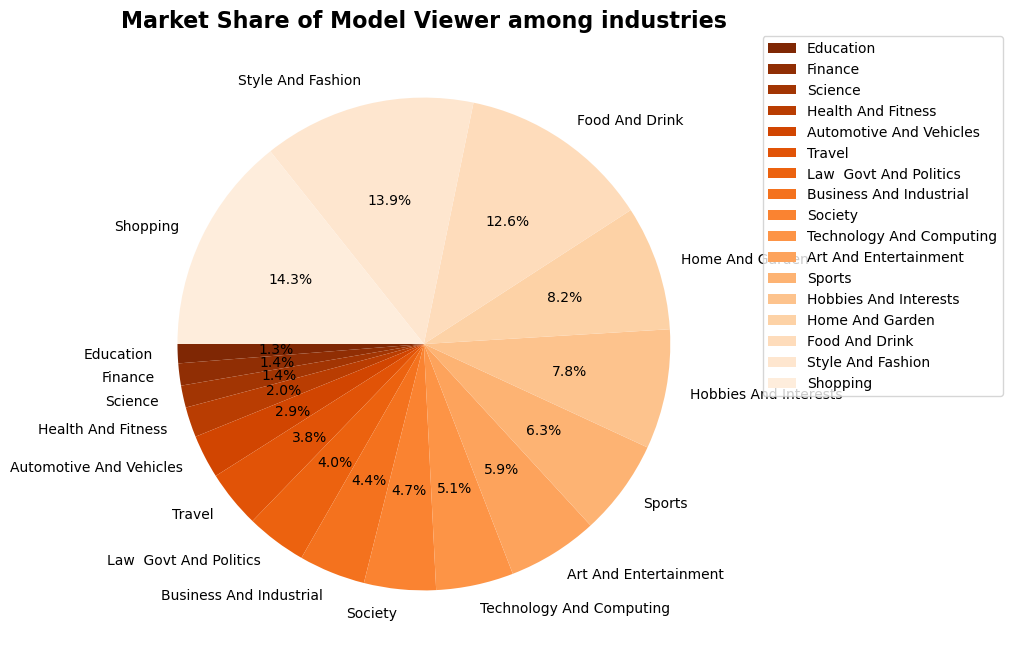

In [43]:
labels = 'Education', 'Finance', 'Science', 'Health And Fitness', 
'Automotive And Vehicles', 'Travel', 'Law Govt And Politics', 
'Business And Industrial', 'Society', 'Technology And Computing', 
'Art And Entertainment', 'Sports', 'Hobbies And Interests', 
'Home And Garden', 'Food And Drink', 'Style And Fashion', 'Shopping' 
sizes = [1.3, 1.4, 2.0, 2.9, 4.0, 4.4, 4.7, 5.1, 6.3, 7.8, 8.2, 12.6, 13.9, 14.3, 6.6, 8.2, 7.8] 
colors = plt.cm.Oranges(range(256, 256 - len(sizes)*15, -15)) # Generate color gradient within the 'Oranges' colormap
ms_Model_Viewer['Market Share'].sort_values().plot(kind = 'pie', figsize=(8, 8),autopct='%.1f%%',
                                                   radius = 1,startangle = 180,counterclock = True,
                                                   wedgeprops = {'linewidth': 1.5},
                                                   textprops = {'fontsize':10, 'color':'black'},
                                                   colors=colors)

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.title('Market Share of Model Viewer among industries', fontsize=16, fontweight='bold') 
plt.ylabel('', fontsize=16, fontweight='bold')
plt.show()

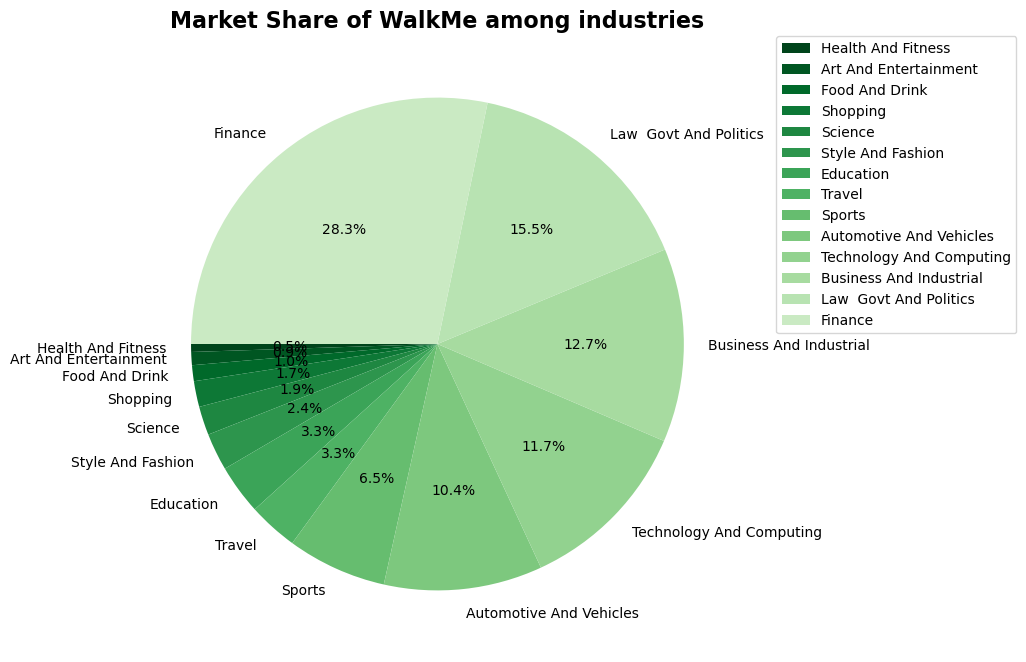

In [44]:
labels = 'Education', 'Finance', 'Science', 'Health And Fitness', 
'Automotive And Vehicles', 'Travel', 'Law Govt And Politics', 
'Business And Industrial', 'Society', 'Technology And Computing', 
'Art And Entertainment', 'Sports', 'Hobbies And Interests', 
'Home And Garden', 'Food And Drink', 'Style And Fashion', 'Shopping' 
sizes = [1.3, 1.4, 2.0, 2.9, 4.0, 4.4, 4.7, 5.1, 6.3, 7.8, 8.2, 12.6, 13.9, 14.3, 6.6, 8.2, 7.8] 
colors = plt.cm.Greens(range(256, 256 - len(sizes)*15, -15)) # Generate color gradient within the 'Greens' colormap
ms_WalkMe['Market Share'].sort_values().plot(kind = 'pie', figsize=(8, 8), autopct='%.1f%%',
                                             radius = 1,startangle = 180, counterclock = True,
                                             wedgeprops = {'linewidth': 1.5},
                                             textprops = {'fontsize':10, 'color':'black'},
                                             colors=colors)

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.title('Market Share of WalkMe among industries', fontsize=16, fontweight='bold')
plt.ylabel('', fontsize=16, fontweight='bold')
plt.show()

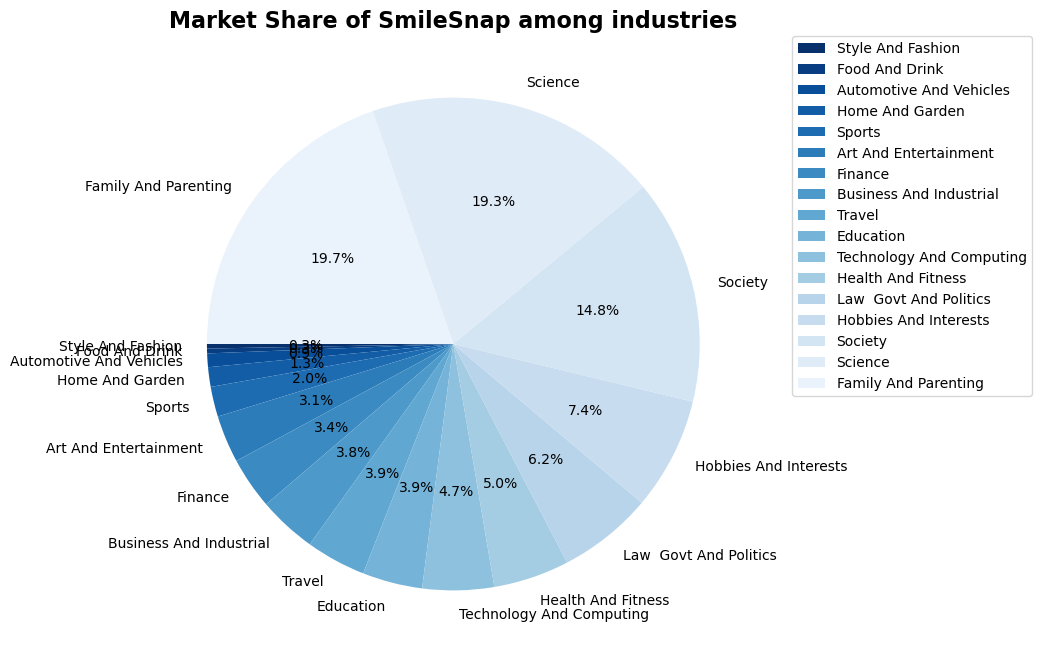

In [45]:
labels = 'Education', 'Finance', 'Science', 'Health And Fitness', 'Automotive And Vehicles', 'Travel', 'Law Govt And Politics', 'Business And Industrial', 'Society', 'Technology And Computing', 'Art And Entertainment', 'Sports', 'Hobbies And Interests', 'Home And Garden', 'Food And Drink', 'Style And Fashion', 'Shopping' 
sizes = [1.3, 1.4, 2.0, 2.9, 4.0, 4.4, 4.7, 5.1, 6.3, 7.8, 8.2, 12.6, 13.9, 14.3, 6.6, 8.2, 7.8] 
colors = plt.cm.Blues(range(256, 256 - len(sizes)*15, -15)) # Generate color gradient within the 'Blues' colormap
ms_SmileSnap['Market Share'].sort_values().plot(kind = 'pie', figsize=(8, 8), autopct='%.1f%%',
                                                radius = 1, startangle = 180, counterclock = True,
                                                wedgeprops = {'linewidth': 1.5},
                                                textprops = {'fontsize':10, 'color':'black'},
                                                colors=colors)

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.title('Market Share of SmileSnap among industries', fontsize=16, fontweight='bold') 
plt.ylabel('', fontsize=16, fontweight='bold')
plt.show()

### ii.Abandon ratio Analysis for Model Viewer, WalkMe, SmileSnap 

<Axes: ylabel='category'>

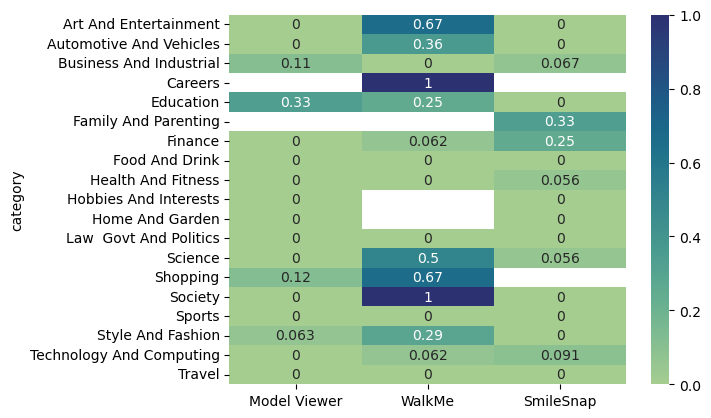

In [46]:
abandon_ratio.set_index('category',inplace=True)
sns.heatmap(data=abandon_ratio,annot=True,cmap='crest')

### iii.Distribution of total spend mean among industries (Model Viewer)

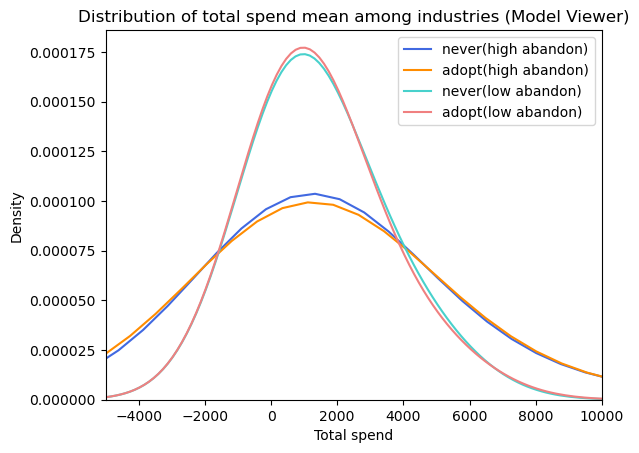

In [47]:
colors = ['RoyalBlue', 'DarkOrange', 'MediumTurquoise', 'LightCoral']

Model_Viewer_data = condensed_data_by_id[condensed_data_by_id['vr_type'] == 'Model Viewer']
MV_high_abandon_ratio_data = Model_Viewer_data[(Model_Viewer_data['category']!='Business And Industrial') & 
                                               (Model_Viewer_data['category']!='Education')]
MV_low_abandon_ratio_data = Model_Viewer_data[(Model_Viewer_data['category']=='Business And Industrial') | 
                                              (Model_Viewer_data['category']=='Education')]
sns.kdeplot(data = MV_high_abandon_ratio_data, x='total_spend_mean(never)',color=colors[0],label='never(high abandon)')
sns.kdeplot(data = MV_high_abandon_ratio_data, x='total_spend_mean(adopt)',color=colors[1],label='adopt(high abandon)')
sns.kdeplot(data = MV_low_abandon_ratio_data, x='total_spend_mean(never)',color=colors[2],label='never(low abandon)')
sns.kdeplot(data = MV_low_abandon_ratio_data, x='total_spend_mean(adopt)',color=colors[3],label='adopt(low abandon)')
plt.xlim(-5000,10000)
plt.xlabel('Total spend')
plt.ylabel('Density')
plt.title('Distribution of total spend mean among industries (Model Viewer)')
plt.legend()

### iv.Distribution of total spend mean in Business And Industrial & Education

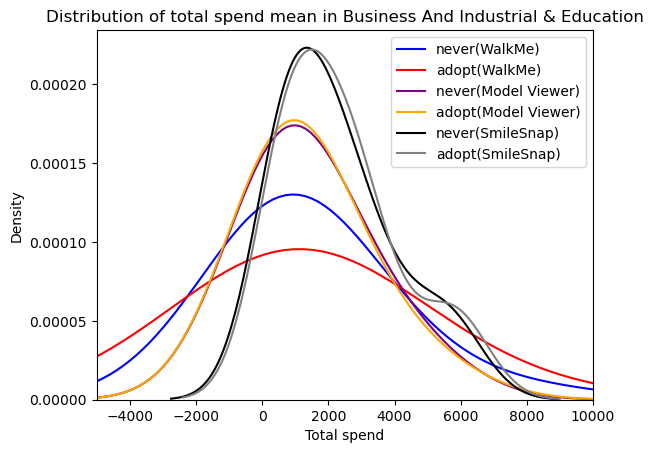

In [48]:
WalkMe_data = condensed_data_by_id[condensed_data_by_id['vr_type'] == 'WalkMe']
WM_2category_data = WalkMe_data[(WalkMe_data['category']=='Business And Industrial') | 
                                              (WalkMe_data['category']=='Education')]
SmileSnap_data = condensed_data_by_id[condensed_data_by_id['vr_type'] == 'SmileSnap']
SS_2category_data = SmileSnap_data[(SmileSnap_data['category']=='Business And Industrial') | 
                                              (SmileSnap_data['category']=='Education')]

sns.kdeplot(data = WM_2category_data, x='total_spend_mean(never)',color='blue',label='never(WalkMe)')
sns.kdeplot(data = WM_2category_data, x='total_spend_mean(adopt)',color='red',label='adopt(WalkMe)')
sns.kdeplot(data = MV_low_abandon_ratio_data, x='total_spend_mean(never)',color='purple',label='never(Model Viewer)')
sns.kdeplot(data = MV_low_abandon_ratio_data, x='total_spend_mean(adopt)',color='orange',label='adopt(Model Viewer)')
sns.kdeplot(data = SS_2category_data, x='total_spend_mean(never)',color='black',label='never(SmileSnap)')
sns.kdeplot(data = SS_2category_data, x='total_spend_mean(adopt)',color='grey',label='adopt(SmileSnap)')

plt.xlim(-5000,10000)
plt.xlabel('Total spend')
plt.ylabel('Density')
plt.title('Distribution of total spend mean in Business And Industrial & Education')
plt.legend()

### v.Distribution of tech spend of users (Business And Industrial)

/Users/jayfan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of tech spend of users (Business And Industrial)')

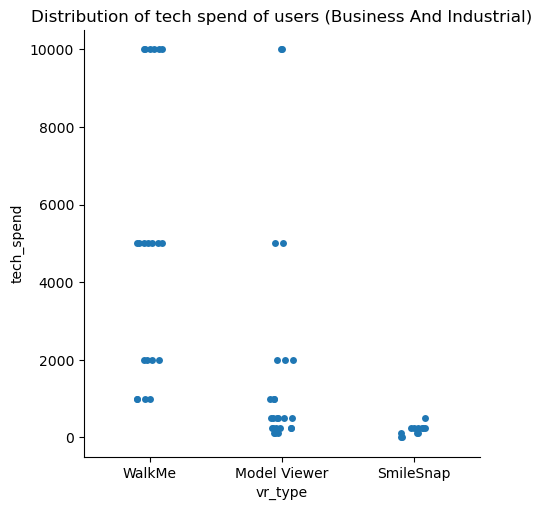

In [49]:
top3_id_data = condensed_data_by_id[condensed_data_by_id['vr_type'].isin(top_3)]
sns.catplot(data=top3_id_data[top3_id_data['category']=='Business And Industrial'], x='vr_type',y='tech_spend')
plt.title('Distribution of tech spend of users (Business And Industrial)')

### vi.Distribution of tech spend of users (Technology And Computing)

/Users/jayfan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of tech spend of users (Technology And Computing)')

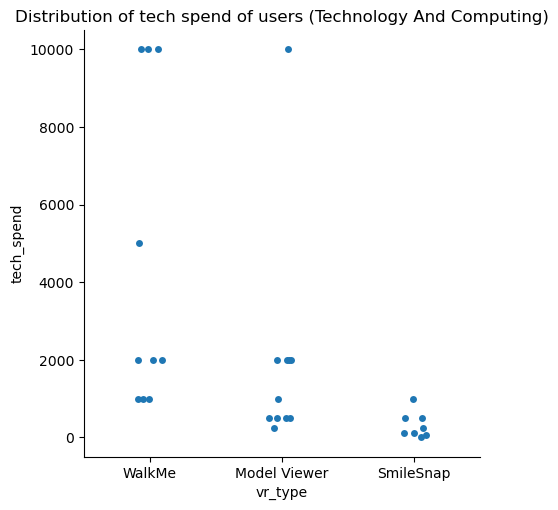

In [50]:
sns.catplot(data = top3_id_data[top3_id_data['category']=='Technology And Computing'],x='vr_type',y='tech_spend')
plt.title('Distribution of tech spend of users (Technology And Computing)')

### vii.Mean adopt days among industries

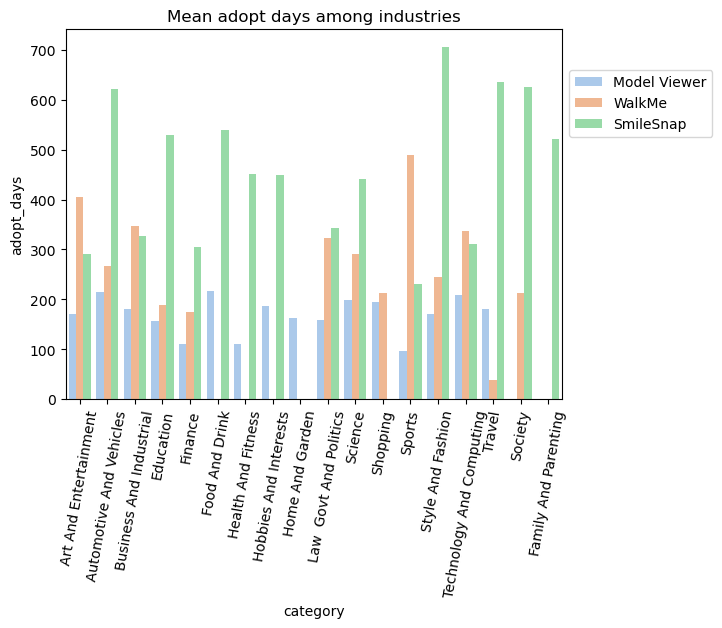

<Figure size 800x600 with 0 Axes>

In [51]:
average_data_1 = Model_Viewer_data.groupby('category')['adopt_days'].mean().reset_index()
average_data_1['vr_type'] = 'Model Viewer'
average_data_2 = WalkMe_data.groupby('category')['adopt_days'].mean().reset_index()
average_data_2['vr_type'] = 'WalkMe'
average_data_3 = SmileSnap_data.groupby('category')['adopt_days'].mean().reset_index()
average_data_3['vr_type'] = 'SmileSnap'
top3_adopt_days_data = pd.concat([average_data_1, average_data_2, average_data_3])
sns.barplot(data = top3_adopt_days_data,x='category',y='adopt_days',hue='vr_type', palette='pastel')
plt.title('Mean adopt days among industries')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.xticks(rotation=80)
plt.figure(figsize=(8, 6))
plt.tight_layout()

### viii.Distribution of First Adopt Date of Model Viewer Users

In [52]:
Model_Viewer_data = top3_cleaned_data[top3_cleaned_data['vr_type'] == 'Model Viewer']
adopt_data = Model_Viewer_data[Model_Viewer_data['adopt_type'] == 'adopt']
adopt_data = adopt_data.drop_duplicates(subset='id', keep='first')
adopt_data = adopt_data[['id', 'date_range_start', 'adopt_days']]
adopt_data['first_adopt_date'] = adopt_data['date_range_start'] - pd.to_timedelta(adopt_data['adopt_days'], unit='days')
adopt_data

,id,date_range_start,adopt_days,first_adopt_date
obs_id,,,,
4680,245,2022-08-01,38.0,2022-06-24
4724,246,2022-05-01,3.0,2022-04-28
4807,248,2022-05-01,22.0,2022-04-09
4920,251,2022-05-01,13.0,2022-04-18
4961,252,2022-04-01,9.0,2022-03-23
...,...,...,...,...
13583,680,2022-10-01,703.0,2020-10-28
13585,682,2022-10-01,211.0,2022-03-04
13588,684,2022-10-01,209.0,2022-03-06


/Users/jayfan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([18444., 18536., 18628., 18718., 18809., 18901., 18993., 19083.,
        19174., 19266.]),
 [Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10')])

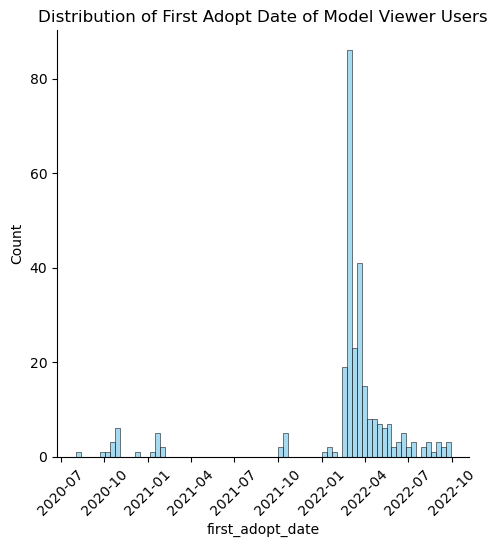

In [53]:
sns.displot(data=adopt_data, x="first_adopt_date", color='skyblue')
plt.title('Distribution of First Adopt Date of Model Viewer Users')
plt.xticks(rotation=45)

### ix.Distribution of total spend overall growth rates for users that adopted Model Viewer VR early or late in the process

In [54]:
df1 = cleaned_data[cleaned_data['adopt_type'] == 'adopt']
overall_growth_rates = {}
initial_values = df1.groupby('id')['total_spend'].first()
final_values = df1.groupby('id')['total_spend'].last()    
overall_growth = ((final_values / initial_values) - 1)*100
overall_growth_rates['total_spend_overall_growth_rate'] = overall_growth
overall_growth_rates = pd.DataFrame(overall_growth_rates)
overall_growth_rates = pd.merge(adopt_data, overall_growth_rates, on = 'id')
overall_growth_rates['first_adopt_date'] = pd.to_datetime(overall_growth_rates['first_adopt_date'])
cutoff_date = pd.to_datetime('2022-03-01')
overall_growth_rates['part_of_year'] = overall_growth_rates['first_adopt_date'].apply(
    lambda x: 'early' if x < cutoff_date else 'late')
overall_growth_rates

,id,date_range_start,adopt_days,first_adopt_date,total_spend_overall_growth_rate,part_of_year
0,245,2022-08-01,38.0,2022-06-24,0.000000,late
1,246,2022-05-01,3.0,2022-04-28,-38.469863,late
2,248,2022-05-01,22.0,2022-04-09,-27.235238,late
3,251,2022-05-01,13.0,2022-04-18,-11.930991,late
4,252,2022-04-01,9.0,2022-03-23,7.966570,late
...,...,...,...,...,...,...
276,680,2022-10-01,703.0,2020-10-28,0.000000,early
277,682,2022-10-01,211.0,2022-03-04,0.000000,late
278,684,2022-10-01,209.0,2022-03-06,0.000000,late
279,685,2022-10-01,790.0,2020-08-02,0.000000,early


/Users/jayfan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(-400.0, 400.0)

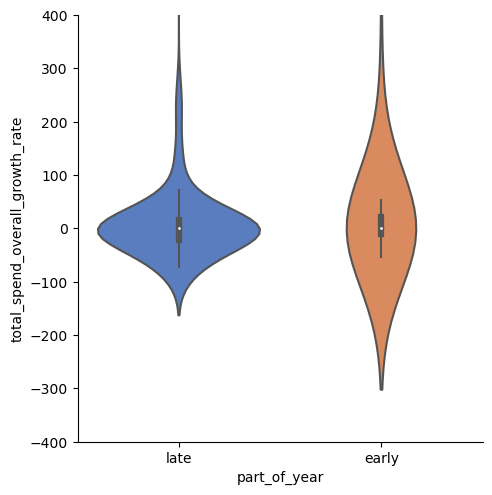

In [55]:
sns.catplot(data = overall_growth_rates, x="part_of_year", y="total_spend_overall_growth_rate", kind="violin",palette='muted')
plt.ylim(-400,400)

## Model Construnction

### i.First linear regression

In [56]:
id_model_data = condensed_data_by_id.copy()
id_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 1 to 995
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_spend_change       639 non-null    float64
 1   total_spend_change_rate  639 non-null    float64
 2   dwell_time_change        639 non-null    float64
 3   dwell_time_change_rate   639 non-null    float64
 4   CR_visit_change          639 non-null    float64
 5   CR_visit_change_rate     639 non-null    float64
 6   total_spend_mean(never)  639 non-null    float64
 7   total_spend_mean(adopt)  639 non-null    float64
 8   online_spend             639 non-null    float64
 9   total_spend              639 non-null    float64
 10  dwell_time_median        639 non-null    float64
 11  CR_visit                 639 non-null    float64
 12  store_quantity_city      639 non-null    float64
 13  average_open_hours       572 non-null    float64
 14  store_size               639 no

Delete entries that have missing values.

In [57]:
id_model_data.dropna(inplace=True)
id_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 1 to 995
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_spend_change       572 non-null    float64
 1   total_spend_change_rate  572 non-null    float64
 2   dwell_time_change        572 non-null    float64
 3   dwell_time_change_rate   572 non-null    float64
 4   CR_visit_change          572 non-null    float64
 5   CR_visit_change_rate     572 non-null    float64
 6   total_spend_mean(never)  572 non-null    float64
 7   total_spend_mean(adopt)  572 non-null    float64
 8   online_spend             572 non-null    float64
 9   total_spend              572 non-null    float64
 10  dwell_time_median        572 non-null    float64
 11  CR_visit                 572 non-null    float64
 12  store_quantity_city      572 non-null    float64
 13  average_open_hours       572 non-null    float64
 14  store_size               572 no

In [58]:
import statsmodels.api as sm
y1 = id_model_data['adopt_days']
X1 = id_model_data[['store_quantity_city', 'vr_type']]
X1 = pd.get_dummies(X1, columns=['vr_type'], dtype=int, drop_first=True)
X1

,store_quantity_city,vr_type_A-Frame,vr_type_Cappasity,vr_type_CloudPano,vr_type_Lapentor,vr_type_Magic 360,vr_type_Model Viewer,vr_type_Panoskin,vr_type_Sirv,vr_type_Smile Virtual,vr_type_SmileSnap,vr_type_Viar.Live,vr_type_WP VR,vr_type_WalkMe,vr_type_WhatFix
id,,,,,,,,,,,,,,,
1,1.003006,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
100,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1001,1.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0
101,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0
988,1.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0
99,1.292952,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [59]:
X1.corr().abs()>0.8

,store_quantity_city,vr_type_A-Frame,vr_type_Cappasity,vr_type_CloudPano,vr_type_Lapentor,vr_type_Magic 360,vr_type_Model Viewer,vr_type_Panoskin,vr_type_Sirv,vr_type_Smile Virtual,vr_type_SmileSnap,vr_type_Viar.Live,vr_type_WP VR,vr_type_WalkMe,vr_type_WhatFix
store_quantity_city,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
vr_type_A-Frame,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
vr_type_Cappasity,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
vr_type_CloudPano,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
vr_type_Lapentor,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
vr_type_Magic 360,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
vr_type_Model Viewer,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
vr_type_Panoskin,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
vr_type_Sirv,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
vr_type_Smile Virtual,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


[]

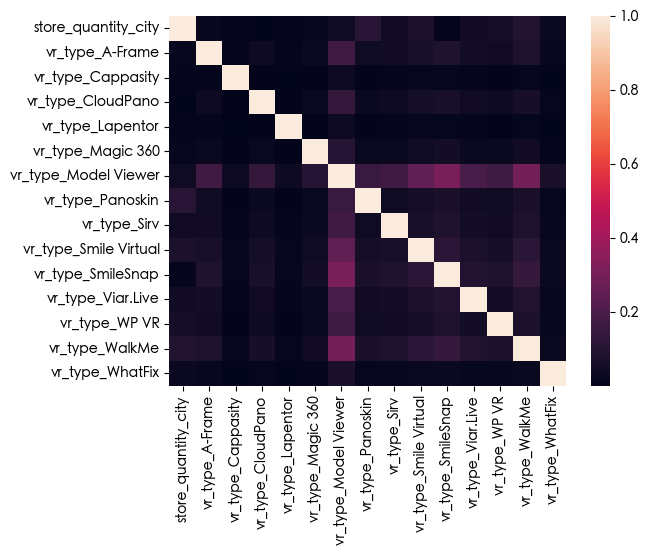

In [60]:
matplotlib.rc("font",family='Heiti TC')
sns.heatmap(X1.corr().abs())
plt.plot()

In [61]:
# X = sm.add_constant(X)
result = sm.OLS(y1, X1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             adopt_days   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.720
Method:                 Least Squares   F-statistic:                              99.26
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                   2.54e-146
Time:                        00:02:18   Log-Likelihood:                         -3814.3
No. Observations:                 572   AIC:                                      7659.
Df Residuals:                     557   BIC:                                      7724.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
store_quantity_city      75.7090     30.741      2.463      0.014      15.326     136.092
vr_type_A-Frame         341.1943     51.540      6.620      0.000     239.958     442.431
vr_type_Cappasity        21.2910    195.424      0.109      0.913    -362.567     405.149
vr_type_CloudPano       209.5997     58.212      3.601      0.000      95.257     323.942
vr_type_Lapentor        210.2910    195.424      1.076      0.282    -173.567     594.149
vr_type_Magic 360       619.9129     71.700      8.646      0.000     479.078     760.748
vr_type_Model Viewer    104.7124     34.660      3.021      0.003      36.632     172.793
vr_type_Panoskin        274.2529     57.657      4.757      0.000     161.001     387.505
vr_type_Sirv            460.7371     50.118      9.193      0.000     362.293     559.181
vr_type_Smile Virtual   341.0457     41.111      8.296      0.000     260.295     421.796
vr_type_SmileSnap       334.5175     39.547      8.459      0.000     256.837     412.198
vr_type_Viar.Live        40.7567     46.562      0.875      0.382     -50.702     132.215
vr_type_WP VR           124.0725     53.816      2.305      0.022      18.365     229.780
vr_type_WalkMe          194.0693     41.603      4.665      0.000     112.351     275.788
vr_type_WhatFix         200.9823    102.588      1.959      0.051      -0.523     402.488
==============================================================================
Omnibus:                       42.212   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.804
Skew:                           0.494   Prob(JB):                     9.41e-17
Kurtosis:                       4.456   Cond. No.                         29.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ii.Second linear regression¶

In [62]:
y2 = id_model_data['total_spend_change_rate']
X2 = id_model_data[['adopt_days', 'CR_visit_change_rate']]
X2

,adopt_days,CR_visit_change_rate
id,,
1,245.0,23.377376
10,52.0,44.841255
100,211.0,156.539501
1001,670.0,128.672338
101,211.0,137.740309
...,...,...
987,751.0,192.487712
988,1215.0,-11.495804
99,814.0,1.318040


In [63]:
X2.corr().abs()>0.8

,adopt_days,CR_visit_change_rate
adopt_days,True,False
CR_visit_change_rate,False,True


[]

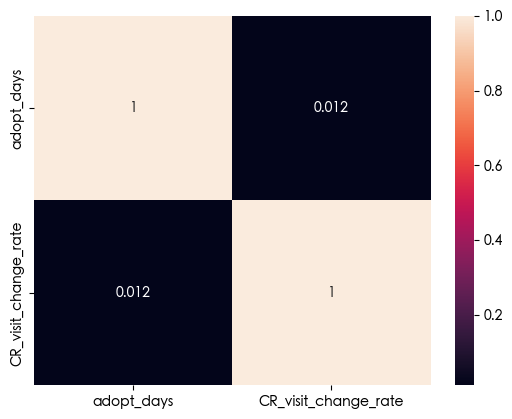

In [64]:
matplotlib.rc("font",family='Heiti TC')
sns.heatmap(X2.corr().abs(), annot=True)
plt.plot()

In [65]:
# X = sm.add_constant(X)
result = sm.OLS(y2, X2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     total_spend_change_rate   R-squared (uncentered):                   0.800
Model:                                 OLS   Adj. R-squared (uncentered):              0.800
Method:                      Least Squares   F-statistic:                              1142.
Date:                     Thu, 14 Dec 2023   Prob (F-statistic):                   4.15e-200
Time:                             00:02:18   Log-Likelihood:                         -3370.4
No. Observations:                      572   AIC:                                      6745.
Df Residuals:                          570   BIC:                                      6754.
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
adopt_days               0.0221      0.010      2.194      0.029       0.002       0.042
CR_visit_change_rate     0.0183      0.000     47.656      0.000       0.018       0.019
==============================================================================
Omnibus:                      833.969   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170803.286
Skew:                           7.956   Prob(JB):                         0.00
Kurtosis:                      86.147   Cond. No.                         26.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### iii.probit regression

In [66]:
y3 = id_model_data[['use_or_not']]  
X3 = id_model_data[['average_open_hours', 'dwell_time_median', 'adopt_days']]
X3

,average_open_hours,dwell_time_median,adopt_days
id,,,
1,8.847363,43.939564,245.0
10,6.762058,24.661234,52.0
100,6.214286,11.340212,211.0
1001,8.714286,125.620000,670.0
101,5.714286,13.345982,211.0
...,...,...,...
987,5.857143,73.875000,751.0
988,7.428571,18.807870,1215.0
99,6.254281,61.062187,814.0


In [67]:
X3.corr().abs()>0.8

,average_open_hours,dwell_time_median,adopt_days
average_open_hours,True,False,False
dwell_time_median,False,True,False
adopt_days,False,False,True


[]

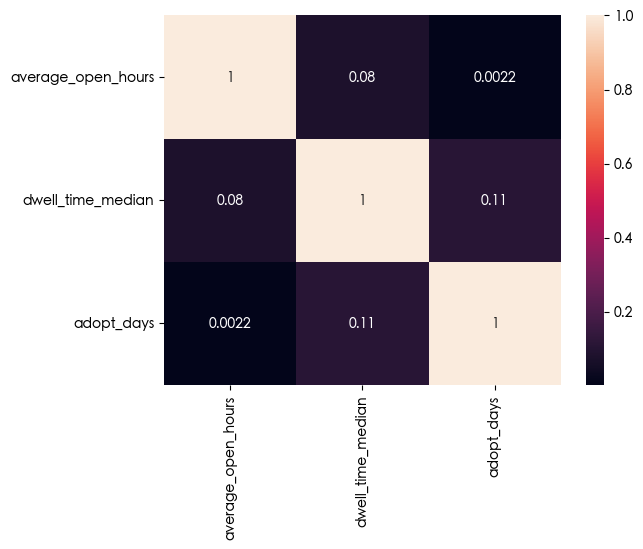

In [68]:
matplotlib.rc("font",family='Heiti TC')
sns.heatmap(X3.corr().abs(), annot=True)
plt.plot()

In [69]:
result = sm.Probit(y3, X3).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.581077
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:             use_or_not   No. Observations:                  572
Model:                         Probit   Df Residuals:                      569
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.1330
Time:                        00:02:18   Log-Likelihood:                -332.38
converged:                       True   LL-Null:                       -383.37
Covariance Type:            nonrobust   LLR p-value:                 7.146e-23
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
average_open_hours     0.0442      0.009      4.708      0.000       0.026       0.063
dwell_time_median     -0.0033      0.001     -3.927      0.000      -0.005      -0.002
adopt_days            -0.0020      0.000     -7.094      0.000      -0.003      -0.001
======================================================================================
"""